In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import matplotlib
import scipy as sp
import numpy as np

In [2]:
df=pd.read_excel("DateofCollection.xlsx")

In [3]:
df

Location       Date      Image time
0       Scottsbluff 2022-07-04  Satellite  TP1
1       Scottsbluff 2022-07-17  Satellite  TP2
2       Scottsbluff 2022-08-07  Satellite  TP3
3       Scottsbluff 2022-08-18  Satellite  TP4
4       Scottsbluff 2022-09-09  Satellite  TP5
5       Scottsbluff 2022-09-24  Satellite  TP6
6       Scottsbluff 2022-07-08        UAV  TP1
7       Scottsbluff 2022-07-22        UAV  TP2
8       Scottsbluff 2022-08-12        UAV  TP3
9      North Platte 2022-07-09  Satellite  TP1
10     North Platte 2022-07-17  Satellite  TP2
11     North Platte 2022-08-04  Satellite  TP3
12     North Platte 2022-08-22  Satellite  TP4
13     North Platte 2022-09-02  Satellite  TP5
14     North Platte 2022-09-25  Satellite  TP6
15     North Platte 2022-07-13        UAV  TP1
16     North Platte 2022-07-19        UAV  TP2
17     North Platte 2022-08-03        UAV  TP3
18          Lincoln 2022-07-18  Satellite  TP1
19          Lincoln 2022-08-06  Satellite  TP2
20          Lincoln 2022-09-03  Satellite  TP3
21          Lincoln 2022-09-11  Satellite  TP4
22          Lincoln 2022-09-19  Satellite  TP5
23          Lincoln 2022-09-27  Satellite  TP6
24          Lincoln 2022-07-13        UAV  TP1
25          Lincoln 2022-07-28        UAV  TP2
26          Lincoln 2022-08-04        UAV  TP3
27  Missouri Valley 2022-07-13  Satellite  TP1
28  Missouri Valley 2022-07-21  Satellite  TP2
29  Missouri Valley 2022-08-08  Satellite  TP3
30  Missouri Valley 2022-09-03  Satellite  TP4
31  Missouri Valley 2022-09-11  Satellite  TP5
32  Missouri Valley 2022-09-19  Satellite  TP6
33  Missouri Valley 2022-07-13        UAV  TP1
34  Missouri Valley 2022-07-27        UAV  TP2
35  Missouri Valley 2022-08-10        UAV  TP3
36             Ames 2022-07-15  Satellite  TP1
37             Ames 2022-07-23  Satellite  TP2
38             Ames 2022-08-10  Satellite  TP3
39             Ames 2022-08-31  Satellite  TP4
40             Ames 2022-09-11  Satellite  TP5
41             Ames 2022-09-24  Satellite  TP6
42             Ames 2022-07-12        UAV  TP1
43             Ames 2022-07-26        UAV  TP2
44             Ames 2022-08-10        UAV  TP3
45   Crawfordsville 2022-07-10  Satellite  TP1
46   Crawfordsville 2022-07-20  Satellite  TP2
47   Crawfordsville 2022-08-02  Satellite  TP3
48   Crawfordsville 2022-09-13  Satellite  TP4
49   Crawfordsville 2022-10-01  Satellite  TP5
50   Crawfordsville 2022-10-09  Satellite  TP6
51   Crawfordsville 2022-07-12        UAV  TP1
52   Crawfordsville 2022-07-26        UAV  TP2
53   Crawfordsville 2022-08-11        UAV  TP3

/home/schnablelab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/schnablelab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_64755/3134630923.py:114: UserWarning: FixedFormatter should only be used together with FixedLocator
  reg.set_xticklabels([round(x) for x in xticks])
/tmp/ipykernel_64755/3134630923.py:115: UserWarning: FixedFormatter should only be used together with FixedLocator
  reg.set_yticklabels([round(y) for y in yticks])
/tmp/ipykernel_64755/3134630923.py:153: UserWarning: FixedFormatter should only be used together with FixedLoc

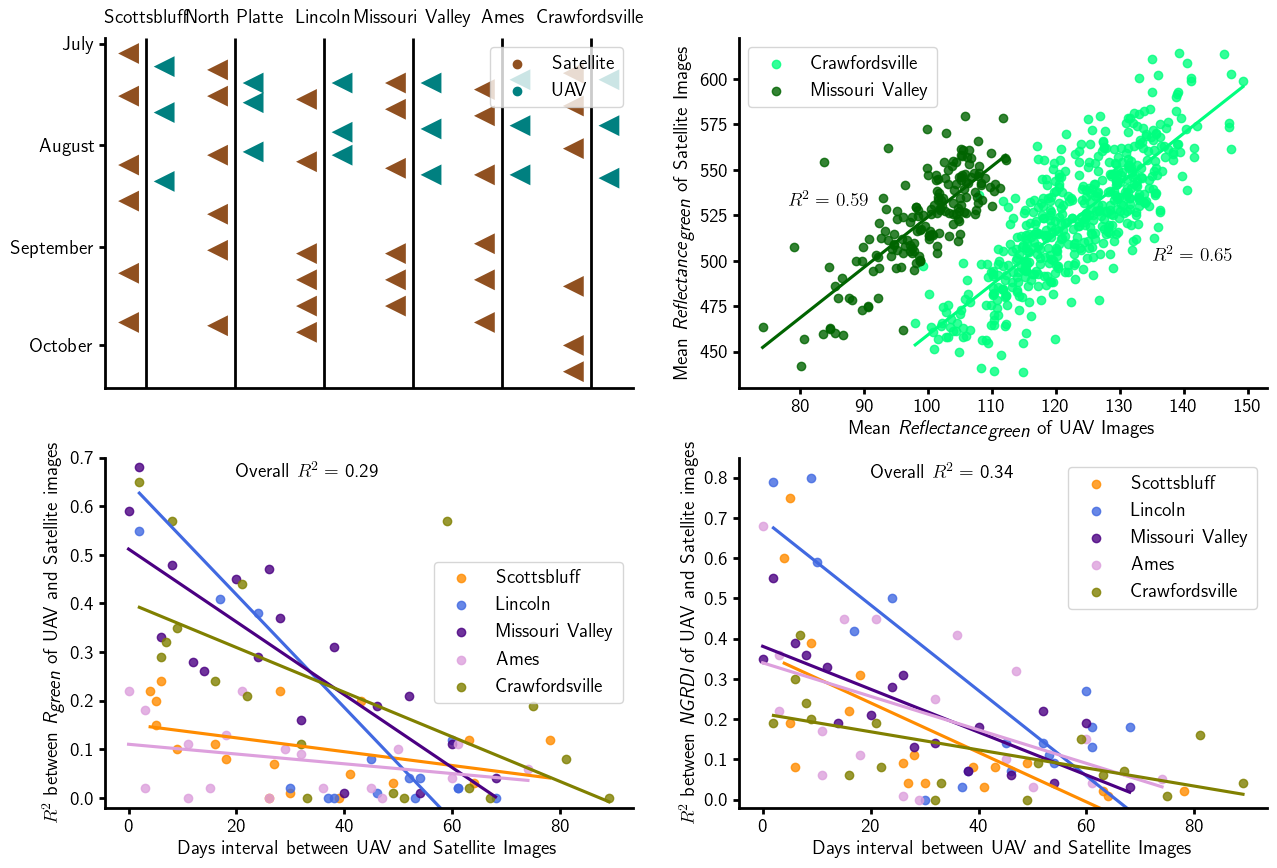

In [72]:
df=pd.read_excel("DateofCollection.xlsx")
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Nimbus Sans",
    "font.size":14,
    'axes.linewidth':2,
    'xtick.major.size':4,
    'ytick.major.size':4,
    'xtick.major.width':2,
    'ytick.major.width':2
    
})
# font = {'family' : 'sans-serif',
#         'weight' : 'normal',
#         'size'   : 30,
#        'color':"black"}

IZ_colors = ['#905020','teal']

fig=plt.figure(figsize=(15,10))
fig.tight_layout(h_pad=2)
# gs = fig.add_gridspec(2,1)
ax1=fig.add_subplot(2,2,1)
# sns.set_context(rc = {'patch.linewidth': 0, 'fontsize':12})
# sns.set_theme(style="ticks", rc={"axes.grid": False})
# sns.set_style({'axes.linewidth': 2,'axes.edgecolor': 'black'})


sns.stripplot(x=df["Location"], y=df['Date'], hue=df['Image'], dodge=True, jitter=0,s=15, marker='<', palette=IZ_colors)

ymin = df["Date"].min()
ymax =  df["Date"].max()
months = pd.date_range(start='2022-07-01', end='2022-10-15', freq='MS')
month_names = [date.strftime('%B') for date in months]
plt.yticks(months,month_names)
y_padding = (ymax - ymin) * 0.05  # Adjust the padding factor as needed
plt.ylim(ymin - y_padding, ymax + y_padding)
plt.yticks(months, month_names)
# plt.xticks(rotation=45)
ax1 = plt.gca()
ax1.tick_params(axis='x', labeltop=True, labelbottom=False, which="both", bottom=False, top=False)

plt.vlines(x=[0,1,2,3,4,5], ymin=ymin- y_padding, ymax=ymax + y_padding, color="black", linewidth=2)

# plt.hlines(y=['2022-07-20','2022-07-30'], xmin=-0.5, xmax=0.5)


# plt.fill_betweenx(y=[pd.Timestamp('2022-07-20'), pd.Timestamp('2022-07-30')], x1=-0.3, x2=0.3, color='brown', alpha=0.1)
# # plt.fill_betweenx(y=[pd.Timestamp('2022-07-20'), pd.Timestamp('2022-07-30')], x1=-0.5, x2=0.5, color='red', alpha=0.2)
# # plt.fill_betweenx(y=[pd.Timestamp('2022-07-20'), pd.Timestamp('2022-07-30')], x1=-0.5, x2=0.5, color='red', alpha=0.2)
# # plt.fill_betweenx(y=[pd.Timestamp('2022-07-20'), pd.Timestamp('2022-07-30')], x1=-0.5, x2=0.5, color='red', alpha=0.2)
# # plt.fill_betweenx(y=[pd.Timestamp('2022-07-20'), pd.Timestamp('2022-07-30')], x1=-0.5, x2=0.5, color='red', alpha=0.2)
# # plt.fill_betweenx(y=[pd.Timestamp('2022-07-20'), pd.Timestamp('2022-07-30')], x1=-0.5, x2=0.5, color='red', alpha=0.2)

plt.legend(bbox_to_anchor=(1,1), loc='upper right')
plt.xlabel('')
plt.ylabel('')
ax1.invert_yaxis()
sns.despine(bottom = True, right=True, top=False)

# plt.show()

Finaldf=pd.read_csv("../Figure1B/Df_ForFiguresBandC.csv")

locations=Finaldf.location.unique()
ax2=fig.add_subplot(2,2,2) 
IZ_colors = ['springgreen','darkgreen']
# Iterate over locations and overlay lmplot for each


for i, location in enumerate(locations):
    location_data = Finaldf[Finaldf['location'] == location]
    
    # sns.set_context(rc={'patch.linewidth': 2, 'fontsize': 30,"font.family": "sans-serif","font.sans-serif": "Nimbus Sans"})
    # sns.set_theme(style="ticks", rc={"axes.grid": False})
    # sns.set_style({'axes.linewidth': 2, 'axes.edgecolor': 'black'})
    
    reg=sns.regplot(data=location_data, x='Green_mean', y='Green_mean_sat', label=location,color=IZ_colors[i % len(IZ_colors)],ci=None)
    
    y_pred = location_data['Green_mean']  # Get the predicted values from the regression line
    y_true = location_data['Green_mean_sat']    # Get the actual values
    r,p = sp.stats.pearsonr(location_data['Green_mean'], location_data['Green_mean_sat'])
    
          # Round to two decimal places
    
    # Annotate the plot with R-squared value
    if location=='Missouri Valley':
        r_squared_1 = np.round(r*r, 2)  
        
    elif location=='Crawfordsville':
        r_squared_2 = np.round(r*r, 2) 
      
    
x_coord = 78 # Choose x coordinate for annotation
y_coord = 530  # Choose y coordinate for annotation
plt.text(x_coord, y_coord, f'$R^2={r_squared_1}$')

x_coord = 135  # Choose x coordinate for annotation
y_coord = 500
plt.text(x_coord, y_coord, f'$R^2={r_squared_2}$')

# Set title and axis labels
# plt.title("Linear Regression Plot for Different Locations")
sns.despine(bottom = False, right=True, top=True)
plt.xlabel(r'Mean $\textit{Reflectance}_{\textit{green}}$ of UAV Images')
plt.ylabel(r'Mean $\textit{Reflectance}_{\textit{green}}$ of Satellite Images')
plt.legend()
# ax=plt.gca()
xticks=reg.get_xticks()
yticks=reg.get_yticks()

# reg.set_xticks(xticks)
reg.set_xticklabels([round(x) for x in xticks])
reg.set_yticklabels([round(y) for y in yticks])

########################################################3

#################FigureC###############
df=pd.read_excel("../Figure1A/correlation_multipletimepoints_green_newversion.xlsx")
df=df.dropna()
y_pred = df['difference']  # Get the predicted values from the regression line
y_true = df['r2']    # Get the actual values
r,p = sp.stats.pearsonr(y_pred, y_true)
r_squared = np.round(r*r, 2)  
ax=fig.add_subplot(2,2,3) 
# colors = matplotlib.cm.tab10(range(5))
# ['royalblue','lightsteelblue',  'blueviolet', 'mediumvioletred','plum']
colors = ['darkorange', 'royalblue', 'indigo','plum', 'olive']
markers = ['.', '+', 'x']
location_image=['Scottsbluff','Lincoln', 'Missouri Valley', 'Ames', 'Crawfordsville']
i=0
# for i, value in enumerate(df.location.unique()):
for value in location_image:
    # print(i)
    ax = sns.regplot(x="difference", y="r2", ax=ax,
                     color=colors[i],
                     # marker=markers[i],
                     data=df[df.location == value],
                     label=value,ci=None)
    i=i+1
ax.legend(loc='best') 
plt.ylim(-0.02,0.7)
plt.text(20,0.66,f'Overall $R^2=$ {round(r_squared,2)}')
plt.ylabel(r'$R^2$ between $\textit{R}_{\textit{green}}$ of UAV and Satellite images')
plt.xlabel(r'Days interval between UAV and Satellite Images')
sns.despine(bottom = False, right=True, top=True)


xticks=ax.get_xticks()
yticks=ax.get_yticks()

ax.set_xticklabels([round(x) for x in xticks])
ax.set_yticklabels([round(y,1) for y in yticks])


#################FigureD###############
df=pd.read_excel("../Figure1A/correlation_multipletimepoints_indices_newversion.xlsx")
df=df.dropna()
y_pred = df['difference']  # Get the predicted values from the regression line
y_true = df['r2']    # Get the actual values
r,p = sp.stats.pearsonr(y_pred, y_true)
r_squared = np.round(r*r, 2)  
ax=fig.add_subplot(2,2,4) 
colors = ['darkorange', 'royalblue', 'indigo','plum', 'olive']
markers = ['.', '+', 'x']
location_image=['Scottsbluff','Lincoln', 'Missouri Valley', 'Ames', 'Crawfordsville']
i=0
# for i, value in enumerate(df.location.unique()):
for value in location_image:
    # print(i)
    ax = sns.regplot(x="difference", y="r2", ax=ax,
                     color=colors[i],
                     # marker=markers[i],
                     data=df[df.location == value],
                     label=value,ci=None)
    i=i+1
ax.legend(loc='best') 
plt.ylim(-0.02,0.85)
plt.text(20,0.8,f'Overall $R^2=$ {round(r_squared,2)}')
plt.ylabel(r'$R^2$ between $\textit{NGRDI}$ of UAV and Satellite images')
plt.xlabel(r'Days interval between UAV and Satellite Images')
sns.despine(bottom = False, right=True, top=True)


xticks=ax.get_xticks()
yticks=ax.get_yticks()

ax.set_xticklabels([round(x) for x in xticks])
ax.set_yticklabels([round(y,1) for y in yticks])


plt.savefig("../Figure1.svg",dpi=350)
plt.savefig('../Figure1.png', dpi=350)

plt.show()

In [7]:
##Floweirng time range in each location

Crawfordsville=pd.read_csv("/home/schnablelab/Documents/NNSatelliteImages/Data/Lincoln/UAV/RGBuav_TP2.csv")
Crawfordsville['range_row']=Crawfordsville['range'].astype(str)+'_'+Crawfordsville['row'].astype(str)+'_'+Crawfordsville['exp'].astype(str)
Crawfordsville=Crawfordsville[['file_','Green_mean','range_row']]
Crawfordsville['location']='Crawfordsville'

Crawfordsvillesat=pd.read_csv("/home/schnablelab/Documents/NNSatelliteImages/Data/Lincoln/Satelliteimages/sixband/SatelliteImage_6bands_TP2.csv")
Crawfordsvillesat['range_row']=Crawfordsvillesat['range'].astype(str)+'_'+Crawfordsvillesat['row'].astype(str)+'_'+Crawfordsvillesat['exp'].astype(str)
Crawfordsvillesat=Crawfordsvillesat[['file_','Green_mean','range_row']]
Crawfordsvillesat.columns=['file_','Green_mean_sat','range_row']

Crawfordsvilledf=pd.merge(Crawfordsville,Crawfordsvillesat, left_on='range_row',right_on='range_row',how="inner")

y_pred = Crawfordsvilledf['Green_mean']  # Get the predicted values from the regression line
y_true = Crawfordsvilledf['Green_mean_sat']    # Get the actual values
r,p = sp.stats.pearsonr(y_pred, y_true)
r_squared = np.round(r*r, 2)   

print(r_squared,p)

0.66 4.8819530391726265e-124


In [60]:
matplotlib.cm.tab20(range(5))

array([[0.12156863, 0.46666667, 0.70588235, 1.        ],
       [0.68235294, 0.78039216, 0.90980392, 1.        ],
       [1.        , 0.49803922, 0.05490196, 1.        ],
       [1.        , 0.73333333, 0.47058824, 1.        ],
       [0.17254902, 0.62745098, 0.17254902, 1.        ]])

In [11]:
##Floweirng time range in each location

Crawfordsville=pd.read_csv("/home/schnablelab/Documents/NNSatelliteImages/Data/Crawfordsville/UAV/RGBuav_TP1.csv")
Crawfordsville['location']='Crawfordsville'
Crawfordsville=Crawfordsville[['file_','Green_mean','Red_mean','NGRDI_mean','location']]


Crawfordsvillesat=pd.read_csv("/home/schnablelab/Documents/NNSatelliteImages/Data/Crawfordsville/Satelliteimages/sixband/SatelliteImage_6bands_TP1_genotype.csv")
# Crawfordsvillesat['location']='Crawfordville'
Crawfordsvillesat=Crawfordsvillesat[['file_','Green_mean','Red_mean','NGRDI_mean']]
Crawfordsvillesat.columns=['file_','Green_mean_sat','Red_mean_sat','NGRDI_mean_sat']

Crawfordvillefinal=pd.merge(Crawfordsville,Crawfordsvillesat, left_on='file_', right_on='file_', how='inner')

#################MO###############
MO=pd.read_csv("/home/schnablelab/Documents/NNSatelliteImages/Data/Movalley/UAV/RGBuav_TP1.csv")
MO['location']='Missouri Valley'
MO=MO[['file_','Green_mean','Red_mean','NGRDI_mean','location']]


MOsat=pd.read_csv("/home/schnablelab/Documents/NNSatelliteImages/Data/Movalley/Satelliteimages/sixband/SatelliteImage_6bands_TP1_genotype.csv")
MOsat['location']='Crawfordville'
MOsat=MOsat[['file_','Green_mean','Red_mean','NGRDI_mean']]
MOsat.columns=['file_','Green_mean_sat','Red_mean_sat','NGRDI_mean_sat']

MOfinal=pd.merge(MO,MOsat, left_on='file_', right_on='file_', how='inner')

finaldf_BC=pd.concat([Crawfordvillefinal, MOfinal])

finaldf_BC.to_csv("../Figure1B/Df_ForFiguresBandC.csv", index=False)

In [35]:
import os 
path='/home/schnablelab/Documents/NNSatelliteImages/Data/'
mainfolder=os.listdir(path)
data='Green_mean'
R2=[]

for folder in mainfolder:
    if not folder.endswith('.csv'):
        location=folder
        # print(location)
        subfolder=os.listdir(os.path.join(path,folder))
        satelliteimages=[]
        for imagefolder in subfolder:
            if imagefolder=='Satelliteimages':
                Satellitefolder=os.path.join(path,folder,imagefolder)
                for insidesat in os.listdir(Satellitefolder):
                    if insidesat=='sixband':
                        satfolder=os.path.join(Satellitefolder,insidesat)
                        satfiles=os.listdir(satfolder)
                        
                        for satfile in satfiles:
                            if not satfile.endswith('_genotype.csv'):
                                continue
                            satfilefolder=os.path.join(satfolder,satfile)
                            # print(satfilefolder)
                            satelliteimages.append(satfilefolder)
            
            if imagefolder=='UAV':
                UAVimagefolder=os.path.join(path,folder,imagefolder)
                Uavimage=(os.listdir(UAVimagefolder))
                
                
                for finaluav in Uavimage:
                    
                    if not finaluav.endswith('_genotype.csv'):
                        continue

                    finaluavimagepath=os.path.join(UAVimagefolder,finaluav)
                    
                    RGBtimepoint=finaluav.split('_')[-2].split('.')[0]
                    # print(finaluav.split('_')[-2].split('.'))
                    
                    rgbdf=pd.read_csv(finaluavimagepath)
                    # print(rgbdf.columns)
                    
                    rgbdf['range_row']=rgbdf['range'].astype(str)+'_'+rgbdf['row'].astype(str)+'_'+rgbdf['exp'].astype(str)
                    
                    rgbdf=rgbdf[['file_',f'{data}','range_row']]
                    
                    for i in satelliteimages:
                        satdf=pd.read_csv(i)
                        # print(i)
                        
                        sattimepoint=os.path.basename(i).split('_')[-2].split('.')[0]
                        
                        satdf['range_row']=satdf['range'].astype(str)+'_'+satdf['row'].astype(str)+'_'+satdf['exp'].astype(str)
                        
                        satdf=satdf[['file_',f'{data}','range_row']]
                        
                        satdf.columns=['file_',f'{data}_sat','range_row']
                        
                        finaldf=pd.merge(rgbdf,satdf, left_on='range_row',right_on='range_row',how="inner")
                        
                        y_pred = finaldf[f'{data}']  # Get the predicted values from the regression line
                        y_true = finaldf[f'{data}_sat']    # Get the actual values
                        r,p = sp.stats.pearsonr(y_pred, y_true)
                        r_squared = np.round(r*r, 2)  
                        # print(r_squared)
                        
                        R2.append({
                            'location':location,
                            'UAV':RGBtimepoint,
                            'satellite':sattimepoint,
                            'r2':r_squared
                        
                        
                        }
                                 )
                    
                    # for imagefolder_corr in subfolder:
                    #     if imagefolder_corr=='Satelliteimages':
                    #         print(imagefolder_corr)

                    

R2=pd.DataFrame(R2)            
R2.to_excel('correlation_multipletimepoints_green_newversion.xlsx', index=False)

In [36]:
R2

location  UAV satellite    r2
0   Scottsbluff  TP3       TP1  0.00
1   Scottsbluff  TP3       TP2  0.00
2   Scottsbluff  TP3       TP4  0.24
3   Scottsbluff  TP3       TP3  0.20
4   Scottsbluff  TP3       TP6  0.20
..          ...  ...       ...   ...
85         Ames  TP1       TP2  0.11
86         Ames  TP1       TP4  0.10
87         Ames  TP1       TP3  0.10
88         Ames  TP1       TP6  0.06
89         Ames  TP1       TP5  0.11

[90 rows x 4 columns]

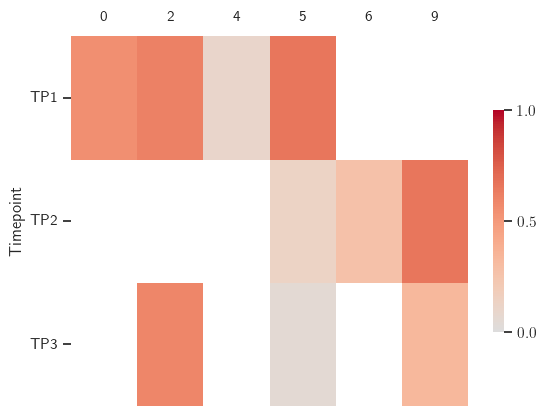

In [9]:
df=pd.read_excel("../Correlation.xlsx", index_col=0)

mask=df.isnull()
sns.heatmap(df, mask=mask, vmin=0, vmax=1, cmap="coolwarm", center=0,cbar_kws={'shrink': 0.6,'ticks':[0, .5, 1]})
ax = plt.gca()
ax.tick_params(axis='x', labeltop=True, labelbottom=False, which="both", bottom=False, top=False)
plt.yticks(rotation=0)

plt.show()

0.33


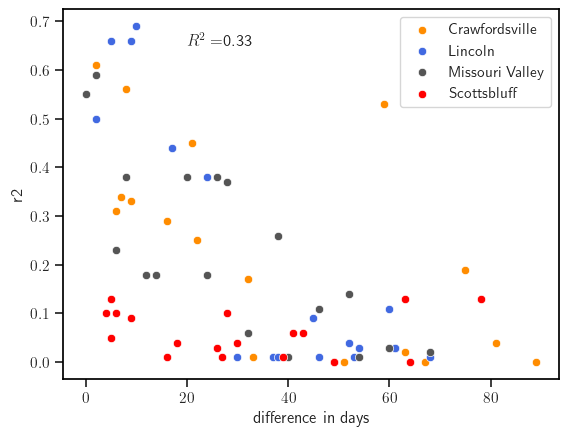

In [15]:
df=pd.read_excel("../Figure1A/correlation_multipletimepoints.xlsx")
df=df.dropna()
fig, ax = plt.subplots() 
colors = ['darkorange', 'royalblue', '#555555','red', 'brown']
y_pred = df['difference']  # Get the predicted values from the regression line
y_true = df['r2']    # Get the actual values
r,p = sp.stats.pearsonr(y_pred, y_true)
r_squared = np.round(r*r, 2)  

print(r_squared)
# sns.scatterplot(data=df, x='difference', y='r2', hue='location',color = ['darkorange', 'royalblue', '#555555','red', 'brown'])


for i, value in enumerate(df.location.unique()):
    # print(value)
    ax = sns.scatterplot(x="difference", y="r2", ax=ax,
                     color=colors[i],
                     data=df[df.location == value],
                     label=value)
ax.legend(loc='best') 
# plt.ylim(0,0.7)
plt.text(20,0.65,f'$R^2=${round(r_squared,2)}')

plt.xlabel('difference in days')

plt.savefig('Correlation_overall.png')

plt.show()

Crawfordsville
Lincoln
Missouri Valley
Scottsbluff


/tmp/ipykernel_647958/3075882936.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([round(x) for x in xticks])
/tmp/ipykernel_647958/3075882936.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(y,1) for y in yticks])


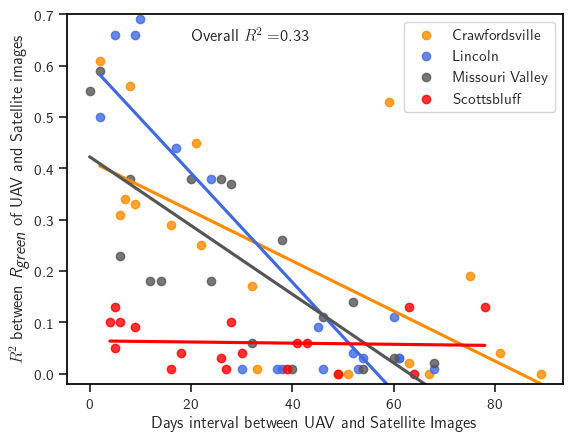

In [20]:
df=pd.read_excel("../Figure1A/correlation_multipletimepoints.xlsx")
df=df.dropna()
y_pred = df['difference']  # Get the predicted values from the regression line
y_true = df['r2']    # Get the actual values
r,p = sp.stats.pearsonr(y_pred, y_true)
r_squared = np.round(r*r, 2)  
fig, ax = plt.subplots() 
colors = ['darkorange', 'royalblue', '#555555','red', 'brown']
markers = ['.', '+', 'x']

for i, value in enumerate(df.location.unique()):
    print(value)
    ax = sns.regplot(x="difference", y="r2", ax=ax,
                     color=colors[i],
                     # marker=markers[i],
                     data=df[df.location == value],
                     label=value,ci=None)
ax.legend(loc='best') 
plt.ylim(-0.02,0.7)
plt.text(20,0.65,f'Overall $R^2=${round(r_squared,2)}')
plt.ylabel(r'$R^2$ between $\textit{R}_{\textit{green}}$ of UAV and Satellite images')
plt.xlabel(r'Days interval between UAV and Satellite Images')



xticks=ax.get_xticks()
yticks=ax.get_yticks()

ax.set_xticklabels([round(x) for x in xticks])
ax.set_yticklabels([round(y,1) for y in yticks])
plt.savefig('Correlation_single.svg', dpi=350)

In [23]:
##Floweirng time range in each location

Crawfordsville=pd.read_csv("/home/schnablelab/Documents/NNSatelliteImages/Data/Scottsbluff/UAV/RGBuav_TP1.csv")
Crawfordsville['range_row']=Crawfordsville['range'].astype(str)+'_'+Crawfordsville['row'].astype(str)+'_'+Crawfordsville['exp'].astype(str)
Crawfordsville=Crawfordsville[['file_','Green_mean','Red_mean','Blue_mean','range_row']]
# Crawfordsville['location']='Crawfordsville'
Crawfordsville.columns=['file_','Green_mean.uav','Red_mean.uav','Blue_mean.uav','range_row']

Crawfordsvillesat=pd.read_csv("/home/schnablelab/Documents/NNSatelliteImages/Data/Scottsbluff/Satelliteimages/sixband/SatelliteImage_6bands_TP1.csv")
Crawfordsvillesat['range_row']=Crawfordsvillesat['range'].astype(str)+'_'+Crawfordsvillesat['row'].astype(str)+'_'+Crawfordsvillesat['exp'].astype(str)
Crawfordsvillesat=Crawfordsvillesat[['file_','Green_mean','Red_mean','Blue_mean','range_row']]
Crawfordsvillesat.columns=['file_','Green_mean.sat','Red_mean.sat','Blue_mean.sat','range_row']

Crawfordsvilledf=pd.merge(Crawfordsville,Crawfordsvillesat, left_on='range_row',right_on='range_row',how="inner")

y_pred = Crawfordsvilledf['Green_mean.uav']  # Get the predicted values from the regression line
y_true = Crawfordsvilledf['Green_mean.sat']    # Get the actual values
r,p = sp.stats.pearsonr(y_pred, y_true)
r_squared = np.round(r*r, 2)   

print(r_squared,p)

0.1 2.862752722041467e-13


0.1


Text(0.5, 1.0, '4 Days Apart')

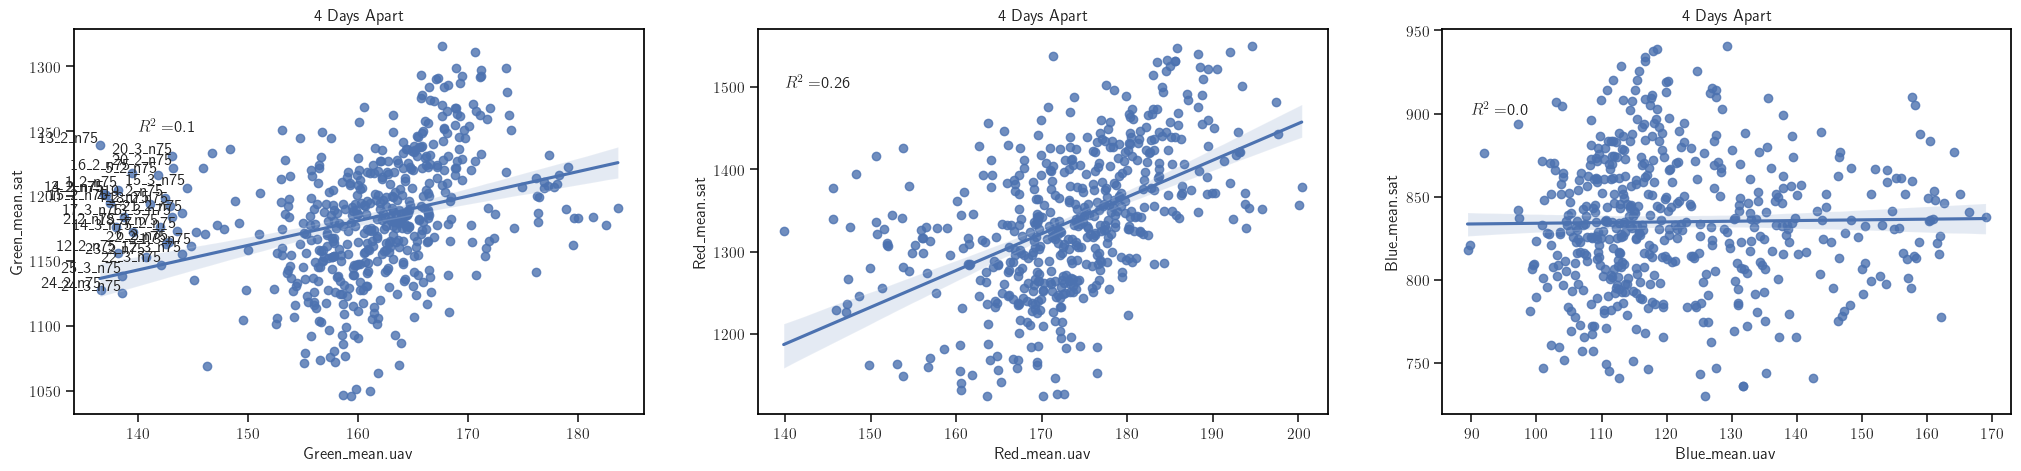

In [24]:

fig=plt.figure(figsize=(25,5))
fig.tight_layout(h_pad=2)
# gs = fig.add_gridspec(2,1)
ax1=fig.add_subplot(1,3,1)

sns.regplot(data=Crawfordsvilledf, x='Green_mean.uav', y='Green_mean.sat')
y_pred = Crawfordsvilledf['Green_mean.uav']  # Get the predicted values from the regression line
y_true = Crawfordsvilledf['Green_mean.sat']    # Get the actual values
r,p = sp.stats.pearsonr(y_pred, y_true)
r_squared = np.round(r*r, 2)   

plt.text(140,1250,f'$R^2=${round(r_squared,2)}')
plt.title('4 Days Apart')

# plt.savefig('Scottsbluff_green_4Daysapart.png')
print(r_squared)
mask = (Crawfordsvilledf["Green_mean.uav"] < 145) & (Crawfordsvilledf["Green_mean.uav"] < 1250) 
x = Crawfordsvilledf["Green_mean.uav"][mask]
y = Crawfordsvilledf["Green_mean.sat"][mask]
names = Crawfordsvilledf.range_row[mask]

texts=[plt.text(x0,y0,name,ha='right',va='bottom') for x0,y0,name in zip(x,y,names)]

ax2=fig.add_subplot(1,3,2)


sns.regplot(data=Crawfordsvilledf, x='Red_mean.uav', y='Red_mean.sat')
y_pred = Crawfordsvilledf['Red_mean.uav']  # Get the predicted values from the regression line
y_true = Crawfordsvilledf['Red_mean.sat']    # Get the actual values
r,p = sp.stats.pearsonr(y_pred, y_true)
r_squared = np.round(r*r, 2)   


plt.text(140,1500,f'$R^2=${round(r_squared,2)}')
plt.title('4 Days Apart')

ax3=fig.add_subplot(1,3,3)
sns.regplot(data=Crawfordsvilledf, x='Blue_mean.uav', y='Blue_mean.sat')
y_pred = Crawfordsvilledf['Blue_mean.uav']  # Get the predicted values from the regression line
y_true = Crawfordsvilledf['Blue_mean.sat']    # Get the actual values
r,p = sp.stats.pearsonr(y_pred, y_true)
r_squared = np.round(r*r, 2)   
plt.text(90,900,f'$R^2=${round(r_squared,2)}')

plt.title('4 Days Apart')

# plt.savefig('Four_days_Aprtfirsttimeframe.png', dpi=350)


In [22]:
names

17     12_13_n150
20     12_16_n150
74      1_14_n150
166     8_16_n150
186    11_23_n225
188    12_18_n225
200    13_23_n225
209    15_18_n225
214    15_23_n225
241    19_23_n225
243     1_18_n225
246     1_21_n225
247     1_22_n225
248     1_23_n225
254    20_23_n225
294     2_21_n225
299     3_19_n225
310     4_23_n225
312     5_18_n225
317     5_23_n225
331     7_23_n225
345     9_23_n225
347      10_2_n75
354      11_2_n75
361      12_2_n75
368      13_2_n75
375      14_2_n75
382      15_2_n75
389      16_2_n75
390      16_3_n75
396      17_2_n75
399      17_5_n75
403      18_2_n75
410      19_2_n75
417       1_2_n75
418       1_3_n75
437      22_2_n75
444      23_2_n75
451      24_2_n75
465       2_2_n75
472       3_2_n75
479       4_2_n75
486       5_2_n75
493       6_2_n75
500       7_2_n75
507       8_2_n75
514       9_2_n75
Name: range_row, dtype: object

In [251]:
for i in mask:
    if i==True:
        print(1)

0.26 1.4727944604601895e-35


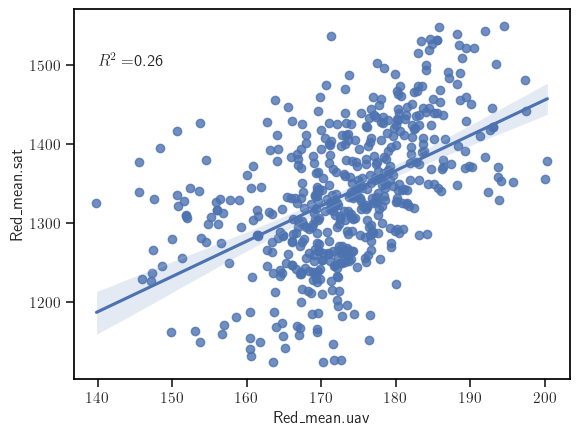

In [294]:
sns.regplot(data=Crawfordsvilledf, x='Red_mean.uav', y='Red_mean.sat')
y_pred = Crawfordsvilledf['Red_mean.uav']  # Get the predicted values from the regression line
y_true = Crawfordsvilledf['Red_mean.sat']    # Get the actual values
r,p = sp.stats.pearsonr(y_pred, y_true)
r_squared = np.round(r*r, 2)   


plt.text(140,1500,f'$R^2=${round(r_squared,2)}')
plt.savefig('Scottsbluff_red_4Daysapart.png')
# print(r_squared)
print(r_squared,p)

0.0 0.7113148919065377


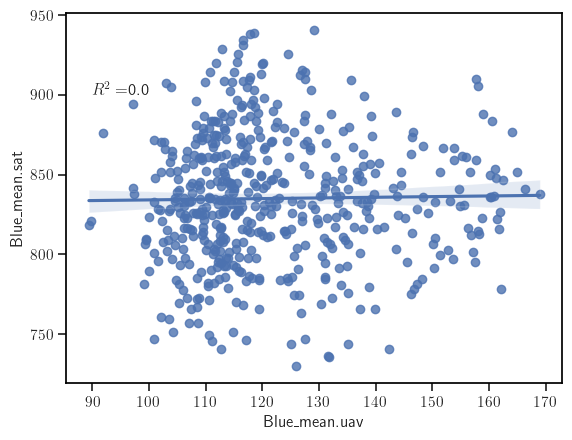

In [296]:
sns.regplot(data=Crawfordsvilledf, x='Blue_mean.uav', y='Blue_mean.sat')
y_pred = Crawfordsvilledf['Blue_mean.uav']  # Get the predicted values from the regression line
y_true = Crawfordsvilledf['Blue_mean.sat']    # Get the actual values
r,p = sp.stats.pearsonr(y_pred, y_true)
r_squared = np.round(r*r, 2)   
plt.text(90,900,f'$R^2=${round(r_squared,2)}')
plt.savefig('Scottsbluff_blue_4Daysapart.png')
print(r_squared,p)